In [1]:
import os
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from detectron2.config import LazyConfig, instantiate

In [2]:
os.environ['MASTER_ADDR'] = '127.0.0.1'  # 这里用本机地址，分布式多机需改为主节点IP
os.environ['MASTER_PORT'] = str(random.randint(1024, 65535)) 
torch.distributed.init_process_group(backend='nccl', init_method='env://', world_size=1, rank=0)

In [3]:
cfg = LazyConfig.load('configs/smartmatting.py')
dataloader = instantiate(cfg.dataloader.train)
dataloader = iter(dataloader)

In [4]:
data = next(dataloader)

In [5]:
image, label = data['image'], data['label']

In [6]:
torch.unique(image)

tensor([0.0000e+00, 2.2978e-05, 3.4467e-05,  ..., 9.9987e-01, 9.9993e-01,
        1.0000e+00])

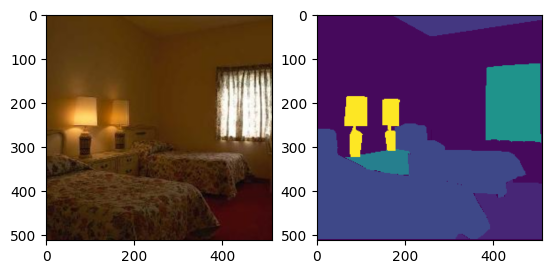

In [14]:
i = 0
plt.subplot(1, 2, 1)  # (rows, cols, index)
plt.imshow(image[i].permute(1,2,0))

# 创建 1行2列的第2个子图
plt.subplot(1, 2, 2)
plt.imshow(label[i][0])


In [10]:
torch.unique(label)

tensor([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,  10.,  12.,  13.,
         16.,  18.,  19.,  35.,  37.,  44.,  87., 137.])